In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
file_path = "StudentsPerformance_with_headers.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

  STUDENT ID  Student Age  Sex  Graduated high-school type  Scholarship type  \
0   STUDENT1            2    2                           3                 3   
1   STUDENT2            2    2                           3                 3   
2   STUDENT3            2    2                           2                 3   
3   STUDENT4            1    1                           1                 3   
4   STUDENT5            2    2                           1                 3   

   Additional work  Regular artistic or sports activity  \
0                1                                    2   
1                1                                    2   
2                2                                    2   
3                1                                    2   
4                2                                    2   

   Do you have a partner  Total salary if available  \
0                      2                          1   
1                      2                          1   

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   STUDENT ID                                                         145 non-null    object
 1   Student Age                                                        145 non-null    int64 
 2   Sex                                                                145 non-null    int64 
 3   Graduated high-school type                                         145 non-null    int64 
 4   Scholarship type                                                   145 non-null    int64 
 5   Additional work                                                    145 non-null    int64 
 6   Regular artistic or sports activity                                145 non-null    int64 
 7   Do you have a partner              

In [4]:
df.describe()

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [5]:
df.shape

(145, 33)

In [6]:
df.columns

Index(['STUDENT ID', 'Student Age', 'Sex', 'Graduated high-school type',
       'Scholarship type', 'Additional work',
       'Regular artistic or sports activity', 'Do you have a partner',
       'Total salary if available', 'Transportation to the university',
       'Accommodation type in Cyprus', 'Mother’s education',
       'Father’s education ', 'Number of sisters/brothers', 'Parental status',
       'Mother’s occupation', 'Father’s occupation', 'Weekly study hours',
       'Reading frequency', 'Reading frequency.1',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Attendance to classes', 'Preparation to midterm exams 1',
       'Preparation to midterm exams 2', 'Taking notes in classes',
       'Listening in classes',
       'Discussion improves my interest and success in the course',
       'Flip-classroom',
       'Cumulative grade point average in the last semester (/4.00)',
       '

In [7]:
df.isnull().sum()

STUDENT ID                                                           0
Student Age                                                          0
Sex                                                                  0
Graduated high-school type                                           0
Scholarship type                                                     0
Additional work                                                      0
Regular artistic or sports activity                                  0
Do you have a partner                                                0
Total salary if available                                            0
Transportation to the university                                     0
Accommodation type in Cyprus                                         0
Mother’s education                                                   0
Father’s education                                                   0
Number of sisters/brothers                                           0
Parent

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# Renommer les colonnes avec des nombres
df2=df.copy()
df2.columns = range(1, len(df.columns) + 1)

# Pour vérifier le changement
print(df2.columns)

RangeIndex(start=1, stop=34, step=1)


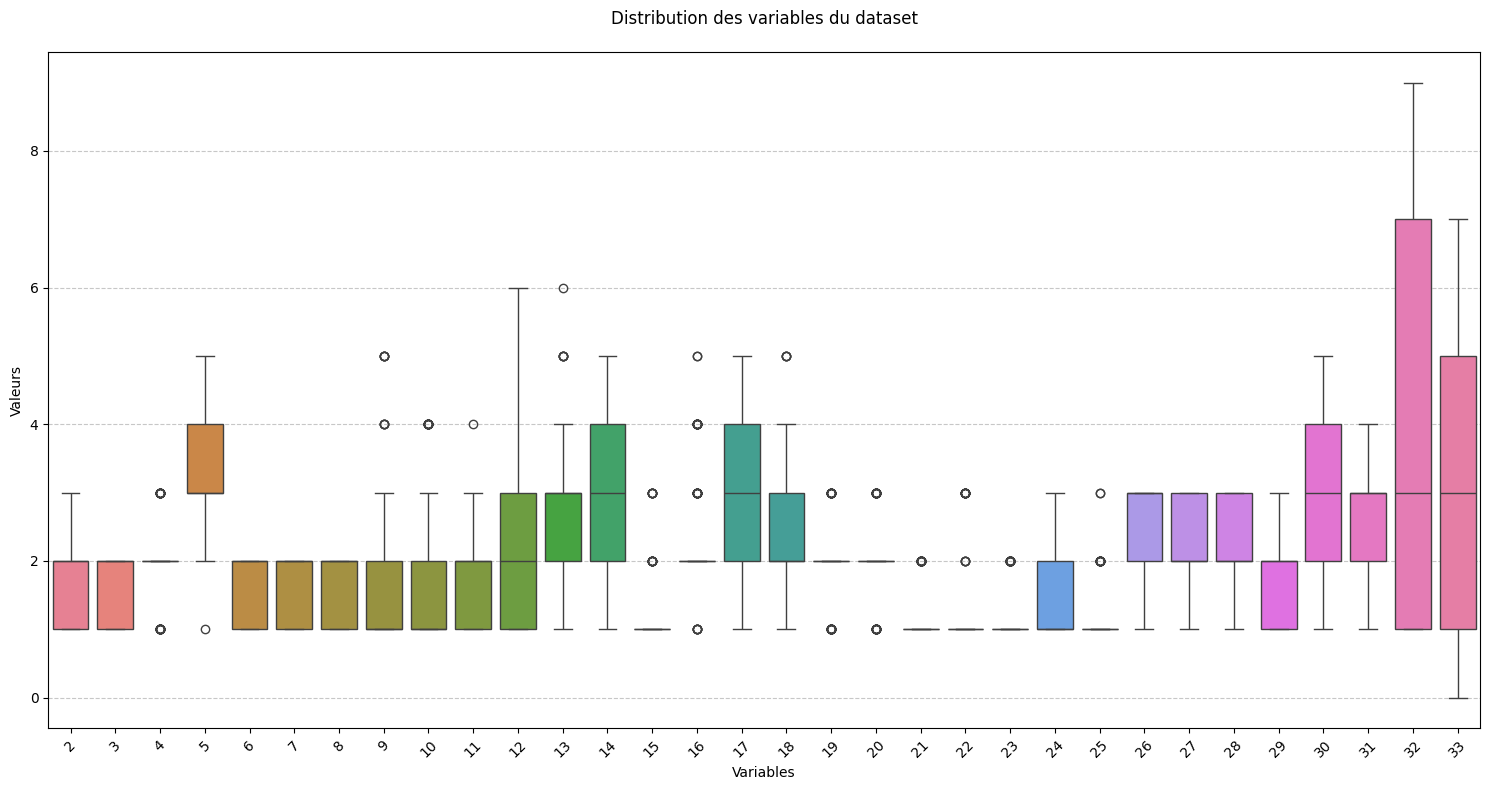

In [10]:
# Création d'un boxplot plus lisible et informatif
plt.figure(figsize=(15, 8))  # Augmentation de la taille
sns.boxplot(data=df2, orient="v", palette="husl")  # Ajout d'une palette de couleurs

# Amélioration des labels et du titre
plt.xticks(rotation=45)  # Meilleure rotation des labels
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.title("Distribution des variables du dataset", pad=20)

# Ajout d'une grille pour faciliter la lecture
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustement des marges
plt.tight_layout()

plt.show()

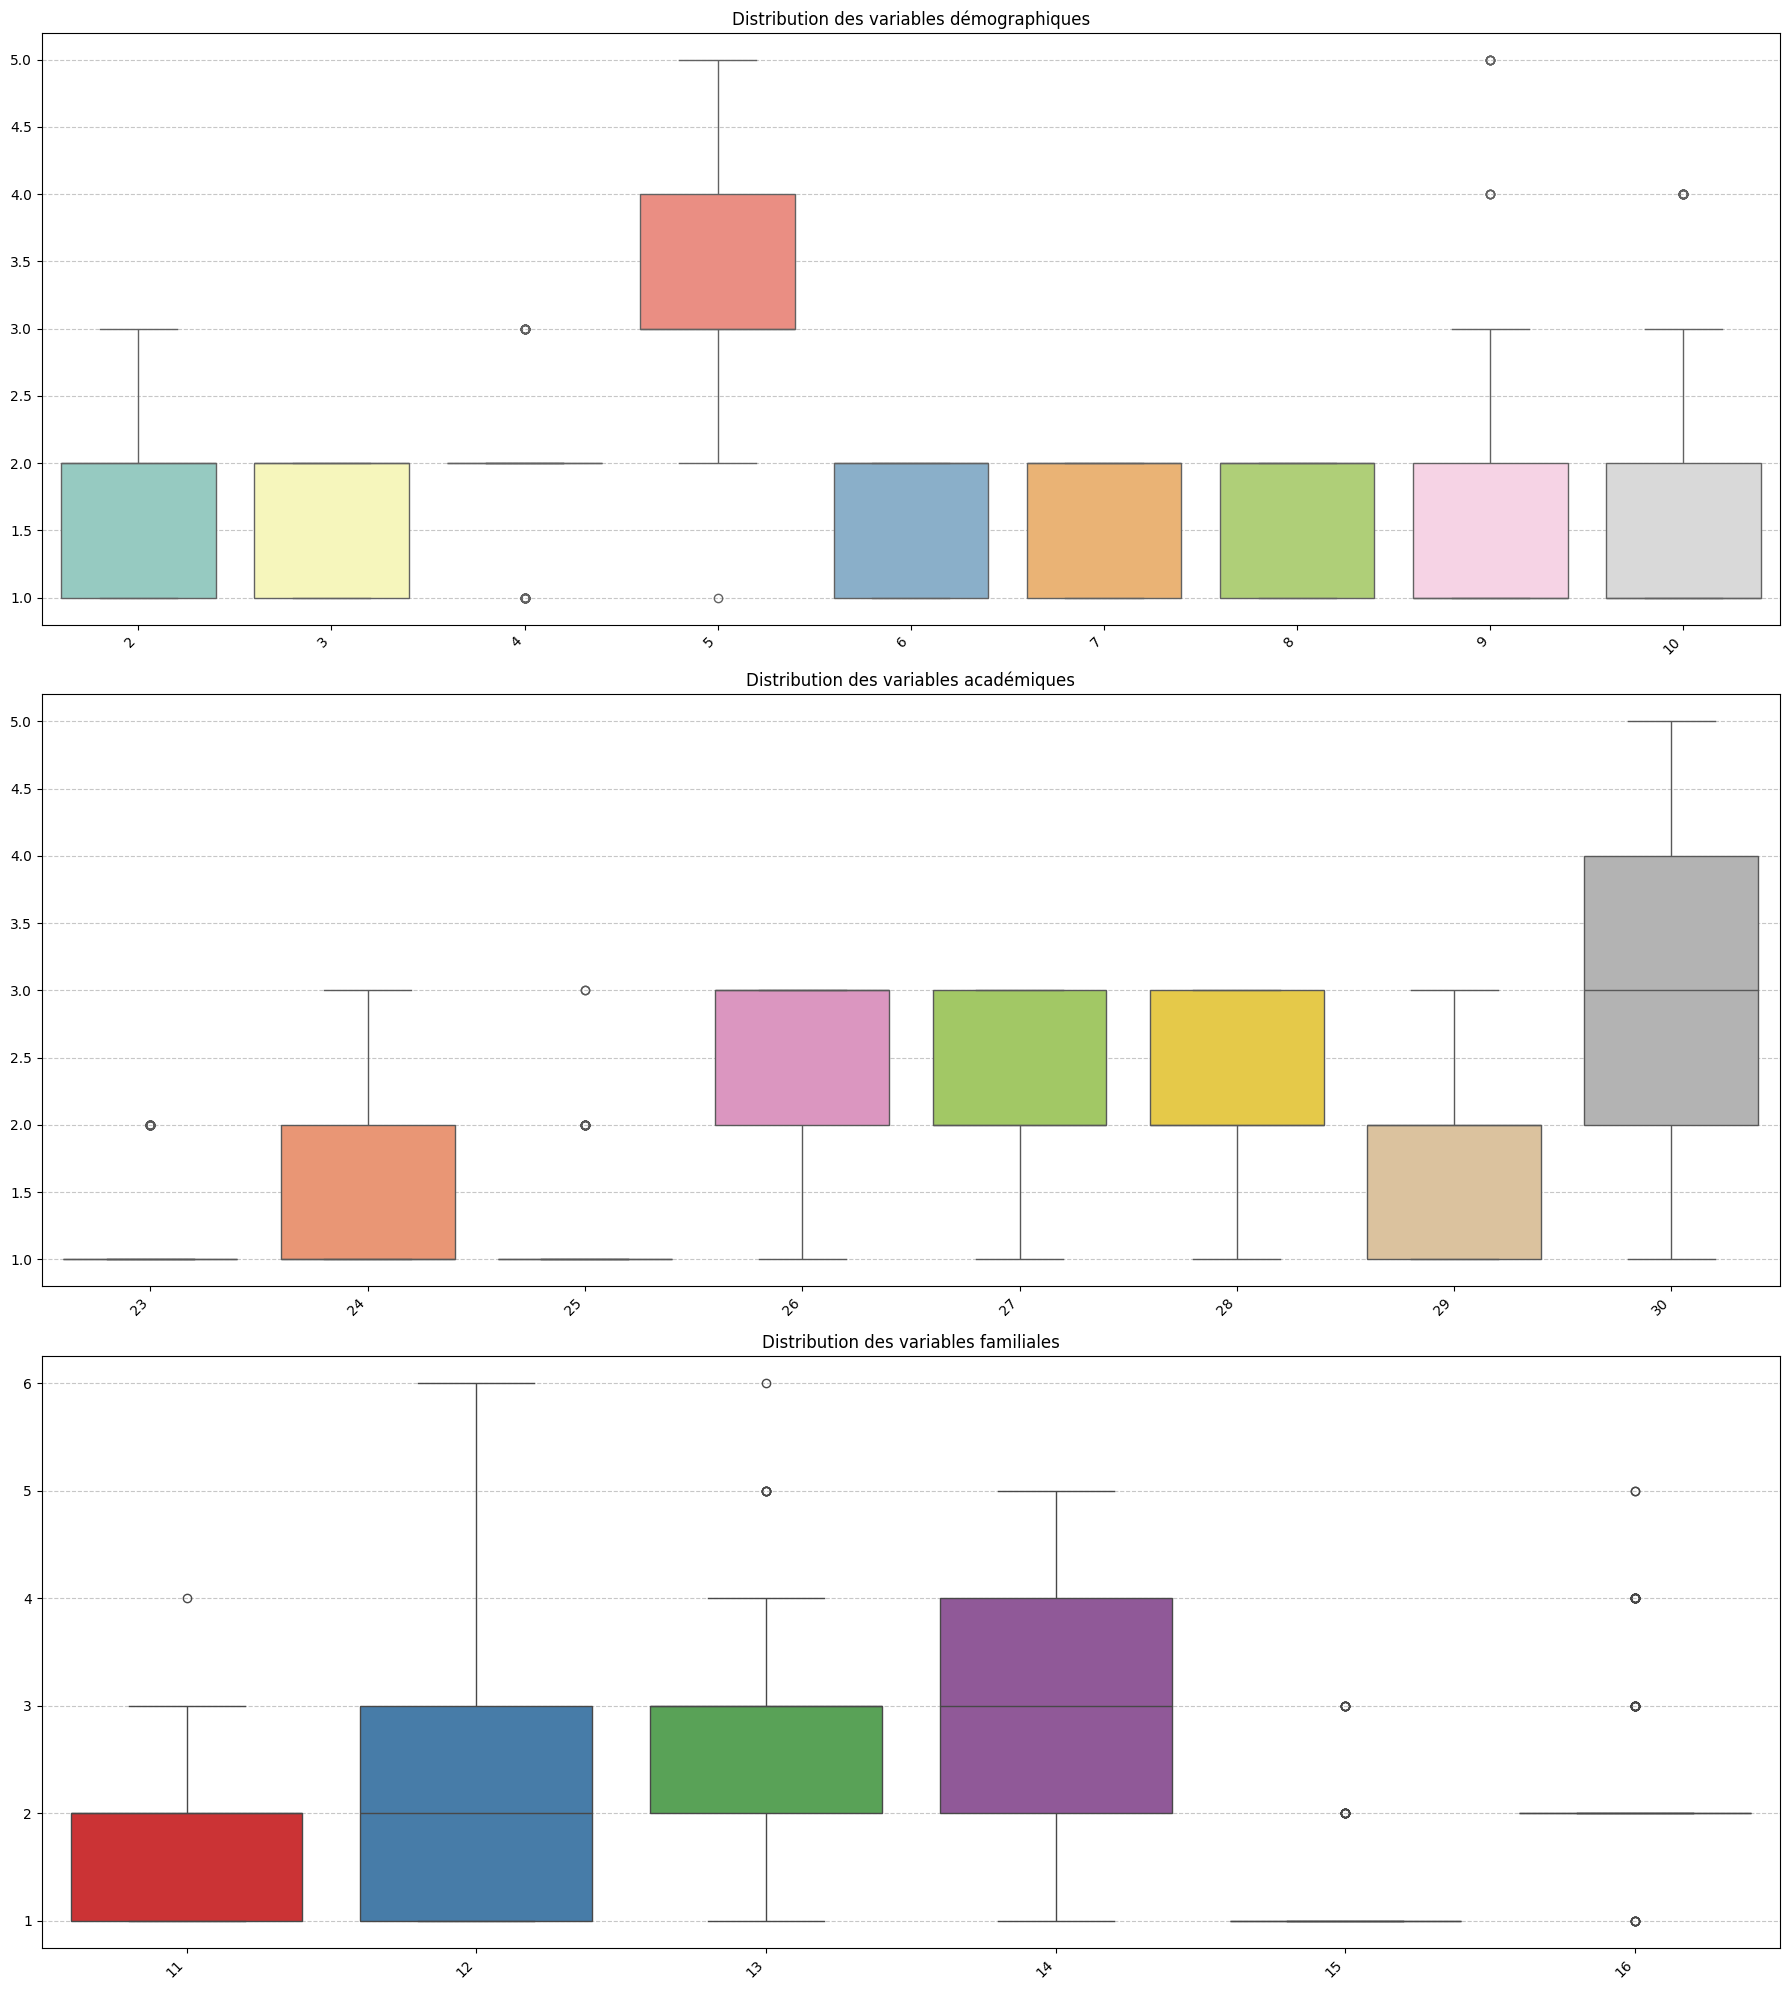

In [11]:
# Création de 3 groupes logiques de variables
demographic_vars = df2[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]  # Variables démographiques
academic_vars    = df2[[23, 24, 25, 26, 27, 28, 29, 30]]  # Variables académiques
family_vars      = df2[[11, 12, 13, 14, 15, 16]]          # Variables familiales

# Création des 3 boxplots (boucle pour code plus propre)
fig, axes = plt.subplots(3, 1, figsize=(18, 20))
datasets = [demographic_vars, academic_vars, family_vars]
palettes = ['Set3', 'Set2', 'Set1']
titles   = [
    "Distribution des variables démographiques",
    "Distribution des variables académiques",
    "Distribution des variables familiales"
]

for ax, data, pal, title in zip(axes, datasets, palettes, titles):
    sns.boxplot(data=data, orient="v", palette=pal, ax=ax)
    ax.set_title(title)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    # Rotation des labels de manière sûre (évite le warning)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [12]:
# Define features and target variable
features = [
    'Student Age', 'Sex', 'Scholarship type',
    'Additional work', 'Regular artistic or sports activity', 'Do you have a partner',
    'Total salary if available', 'Transportation to the university',
    'Preparation to midterm exams 1',
    'Taking notes in classes', 'Listening in classes',
    'Discussion improves my interest and success in the course',
    'Flip-classroom', 'Cumulative grade point average in the last semester (/4.00)'
]

X = df[features]
y = df['Expected Cumulative grade point average in the graduation (/4.00)']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [14]:
# Calcul du coefficient de détermination (R²)
r2 = r2_score(y_test, y_pred)
r2

0.24378334402254376

In [15]:
# Calcul du coefficient de corrélation R
r = np.sqrt(r2)
r

np.float64(0.4937442091027942)

In [16]:
# Calcul du MSE
mse = mean_squared_error(y_test, y_pred)
mse

0.3848522339576115

In [17]:
# Calcul du RMSE
rmse = np.sqrt(mse)
rmse

np.float64(0.6203645976017744)

In [18]:
# Calcul du MAPE
error = mean_absolute_percentage_error(y_test, y_pred)

# Calcul de la précision dérivée du MAPE
print(f'Accuracy of Linear Regression is {((1 - error) * 100):.2f}%')

Accuracy of Linear Regression is 78.08%


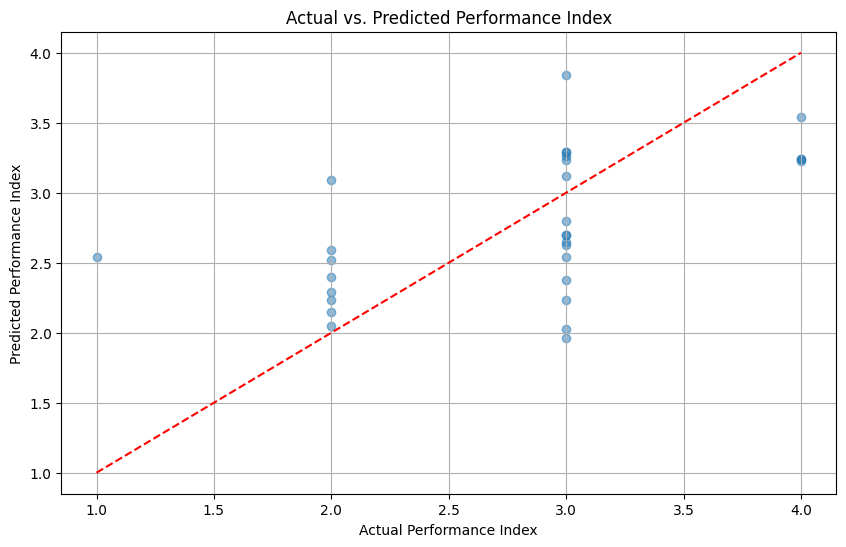

In [19]:
# Scatter plot of Actual vs. Predicted Performance Index
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs. Predicted Performance Index")
plt.grid(True)
plt.show()

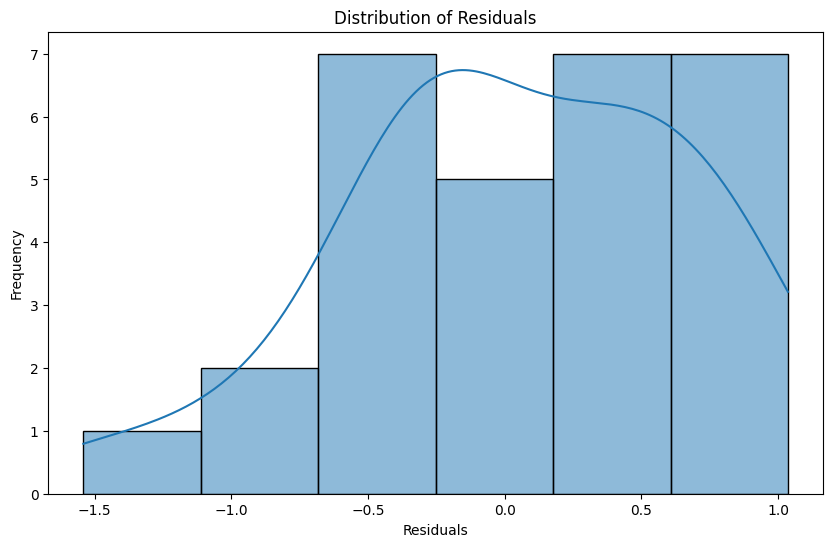

In [20]:
# Residuals plot
residuals = y_test - model.predict(X_test)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

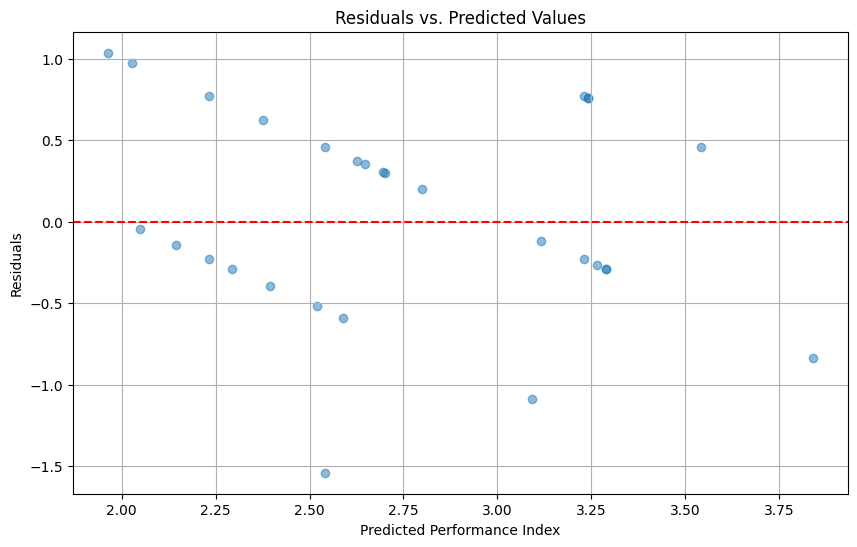

In [21]:
# Residuals vs. Predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X_test), residuals, alpha=0.5)
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()